In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import gzip
import pickle

In [2]:
import scipy as sp


In [3]:
with gzip.open(r'../data/LibData.pkl.gz') as f:
    utilization = pickle.load(f)

In [4]:
attData = pd.read_csv(r'../data/computerAttributes.csv',header=0)

In [5]:
attData.head()

,dbID,computerName,requiresLogon,isDesktop,inJackson,location,is245,floor,numMonitors,largeMonitor,adjacentWindow,collaborativeSpace,roomIsolated,inQuietArea
0,187,BL001,1,1,1,Tower,1,0,1.0,0.0,0.0,0.0,0.0,0.0
1,188,BL002,1,1,1,Tower,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,105,CITI001,1,1,1,CITI Lab,1,1,1.0,0.0,1.0,0.0,0.0,0.0
3,106,CITI002,1,1,1,CITI Lab,1,1,1.0,0.0,0.0,0.0,0.0,0.0
4,107,CITI003,1,1,1,CITI Lab,1,1,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
attData.index = attData['computerName']
attData.head()

,dbID,computerName,requiresLogon,isDesktop,inJackson,location,is245,floor,numMonitors,largeMonitor,adjacentWindow,collaborativeSpace,roomIsolated,inQuietArea
computerName,,,,,,,,,,,,,,
BL001,187,BL001,1,1,1,Tower,1,0,1.0,0.0,0.0,0.0,0.0,0.0
BL002,188,BL002,1,1,1,Tower,1,0,1.0,0.0,0.0,0.0,0.0,0.0
CITI001,105,CITI001,1,1,1,CITI Lab,1,1,1.0,0.0,1.0,0.0,0.0,0.0
CITI002,106,CITI002,1,1,1,CITI Lab,1,1,1.0,0.0,0.0,0.0,0.0,0.0
CITI003,107,CITI003,1,1,1,CITI Lab,1,1,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Looking at the data with just the sum of the usages

utilization.head()

,BL001,BL002,CITI001,CITI002,CITI003,CITI004,CITI005,CITI006,CITI007,CITI008,...,TL5002,TL6001,TL6002,TL7001,TL702,TL801,TL802,TL90003,TL901,TL902
2010-03-24 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-24 13:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-24 14:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-24 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-24 16:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Testing the last 3 years (Fall 14 - Spring 17)

In [8]:
#Split into semesters

#spring2010 = utilization[(utilization.index >= '2010-01-19') & (utilization.index < '2010-05-12')]
#summer2010 = utilization[(utilization.index >= '2010-05-17') & (utilization.index < '2010-08-09')]
#fall2010 = utilization[(utilization.index >= '2010-08-23') & (utilization.index < '2010-12-15')]

#spring2011 = utilization[(utilization.index >= '2011-01-10') & (utilization.index < '2011-05-04')]
#summer2011 = utilization[(utilization.index >= '2011-05-12') & (utilization.index < '2011-08-08')]
#fall2011 = utilization[(utilization.index >= '2011-08-22') & (utilization.index < '2011-12-13')]

#spring2012 = utilization[(utilization.index >= '2012-01-09') & (utilization.index < '2012-05-02')]
#summer2012 = utilization[(utilization.index >= '2012-05-14') & (utilization.index < '2012-08-06')]
#fall2012 = utilization[(utilization.index >= '2012-08-20') & (utilization.index < '2012-12-14')]

#spring2013 = utilization[(utilization.index >= '2013-01-14') & (utilization.index < '2013-05-08')]
#summer2013 = utilization[(utilization.index >= '2013-05-13') & (utilization.index < '2013-08-05')]
#fall2013 = utilization[(utilization.index >= '2013-08-19') & (utilization.index < '2013-12-12')]

#spring14 = utilization[(utilization.index >= '2014-01-13') & (utilization.index < '2014-05-07')]
#summer14 = utilization[(utilization.index >= '2014-05-12') & (utilization.index < '2014-08-05')]

fall14 = utilization[(utilization.index >= '2014-08-18') & (utilization.index < '2014-12-12')]
spring15 = utilization[(utilization.index >= '2015-01-12') & (utilization.index < '2015-05-06')]
summer15 = utilization[(utilization.index >= '2015-05-11') & (utilization.index < '2015-08-03')]
fall15 = utilization[(utilization.index >= '2015-08-17') & (utilization.index < '2015-12-11')]
spring16 = utilization[(utilization.index >= '2016-01-11') & (utilization.index < '2016-05-04')]
summer16 = utilization[(utilization.index >= '2016-05-09') & (utilization.index < '2016-08-05')]
fall16 = utilization[(utilization.index >= '2016-08-22') & (utilization.index < '2016-12-16')]
spring17 = utilization[(utilization.index >= '2017-01-17') & (utilization.index < '2017-05-10')]
summer17 = utilization[(utilization.index >= '2017-05-15') & (utilization.index < '2017-08-07')]

In [9]:
#semesters = [fall2011, spring2012, summer2012, fall2012, spring2013, summer2013, fall2013, spring14, summer14, fall14, spring15, summer15, fall15, spring16, summer16, fall16, spring17, summer17]
semesters3 = [fall14, spring15, summer15, fall15, spring16, summer16, fall16, spring17, summer17]
semesters1 = [spring16, summer16, fall16, spring17, summer17]

In [10]:
#utilization2 = pd.concat(semesters)

utilization2 = pd.concat(semesters3)
utilization4 = utilization2.mean()

attData['utilizationMean'] = utilization4.values

In [11]:
attData.head()

,dbID,computerName,requiresLogon,isDesktop,inJackson,location,is245,floor,numMonitors,largeMonitor,adjacentWindow,collaborativeSpace,roomIsolated,inQuietArea,utilizationMean
computerName,,,,,,,,,,,,,,,
BL001,187,BL001,1,1,1,Tower,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.113052
BL002,188,BL002,1,1,1,Tower,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.101211
CITI001,105,CITI001,1,1,1,CITI Lab,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.081628
CITI002,106,CITI002,1,1,1,CITI Lab,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.088443
CITI003,107,CITI003,1,1,1,CITI Lab,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.077042


In [12]:
attData.shape

(312, 15)

In [13]:
# Only want the machines that require a logon
attData1 = attData[attData['requiresLogon'] != 0]

In [14]:
attData1[attData1['location'] == 'na']

,dbID,computerName,requiresLogon,isDesktop,inJackson,location,is245,floor,numMonitors,largeMonitor,adjacentWindow,collaborativeSpace,roomIsolated,inQuietArea,utilizationMean
computerName,,,,,,,,,,,,,,,
LIBFALL17,377,LIBFALL17,1,1,1,na,0,na,0.0,0.0,0.0,0.0,0.0,0.0,0.00422


In [15]:
attData1 = attData1[attData1['computerName'] != 'LIBFALL17']

In [17]:
attData1.shape

(290, 15)

In [19]:
#attData1.loc[attData1['utilizationMean'].idxmin()]

In [20]:
dataM = attData1['utilizationMean']

five_num = [dataM.quantile(0),   
            dataM.quantile(0.25),
            dataM.quantile(0.50),
            dataM.quantile(0.75),
            dataM.quantile(1)]

High = dataM.quantile(0.75)

five_num

[0.0,
 0.08493502441884679,
 0.1404871901087596,
 0.20230540246239964,
 0.5225797298647847]

In [21]:
# .25 - .3 gives Accuracy Score of 88% - 90% !!!!!!
#attData1['Label'] = attData1['utilizationMean'].map(lambda x: "Low" if x < .28 else "High")

# gives Accuracy Score of 71% - 72%
attData1['Label'] = attData1['utilizationMean'].map(lambda x: "Low" if x < High else "High")
attData1.head()

,dbID,computerName,requiresLogon,isDesktop,inJackson,location,is245,floor,numMonitors,largeMonitor,adjacentWindow,collaborativeSpace,roomIsolated,inQuietArea,utilizationMean,Label
computerName,,,,,,,,,,,,,,,,
BL001,187,BL001,1,1,1,Tower,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.113052,Low
BL002,188,BL002,1,1,1,Tower,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.101211,Low
CITI001,105,CITI001,1,1,1,CITI Lab,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.081628,Low
CITI002,106,CITI002,1,1,1,CITI Lab,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.088443,Low
CITI003,107,CITI003,1,1,1,CITI Lab,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.077042,Low


In [22]:
attData1 = attData1.dropna() 

In [23]:
attData1.iloc[:, [3,4,5,6,7,8,9,10,11,12,13]].head()

,isDesktop,inJackson,location,is245,floor,numMonitors,largeMonitor,adjacentWindow,collaborativeSpace,roomIsolated,inQuietArea
computerName,,,,,,,,,,,
BL001,1,1,Tower,1,0,1.0,0.0,0.0,0.0,0.0,0.0
BL002,1,1,Tower,1,0,1.0,0.0,0.0,0.0,0.0,0.0
CITI001,1,1,CITI Lab,1,1,1.0,0.0,1.0,0.0,0.0,0.0
CITI002,1,1,CITI Lab,1,1,1.0,0.0,0.0,0.0,0.0,0.0
CITI003,1,1,CITI Lab,1,1,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
attData1.iloc[:, [15]].head()

,Label
computerName,
BL001,Low
BL002,Low
CITI001,Low
CITI002,Low
CITI003,Low


In [73]:
#attData1[attData1['floor'] == 'na']

In [26]:
attData1.dtypes

dbID                    int64
computerName           object
requiresLogon           int64
isDesktop               int64
inJackson               int64
location               object
is245                   int64
floor                  object
numMonitors           float64
largeMonitor          float64
adjacentWindow        float64
collaborativeSpace    float64
roomIsolated          float64
inQuietArea           float64
utilizationMean       float64
Label                  object
dtype: object

In [27]:
attData1.location.unique()

array(['Tower', 'CITI Lab', 'Reading Room', 'DMC', 'Info Commons',
       'Checkout Desk', 'Music Library', 'RIS'], dtype=object)

In [28]:
# Map Location to int

locationMap = {'Tower':1, 'CITI Lab':2, 'Reading Room':3, 'DMC':4, 'Info Commons':5, 'Checkout Desk':6, 'Music Library':7, 'RIS':8}

attData1['location'] = attData1['location'].map(lambda x: locationMap.get(x) if x in locationMap else x)

In [29]:
attData1.head()

,dbID,computerName,requiresLogon,isDesktop,inJackson,location,is245,floor,numMonitors,largeMonitor,adjacentWindow,collaborativeSpace,roomIsolated,inQuietArea,utilizationMean,Label
computerName,,,,,,,,,,,,,,,,
BL001,187,BL001,1,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.113052,Low
BL002,188,BL002,1,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.101211,Low
CITI001,105,CITI001,1,1,1,2,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.081628,Low
CITI002,106,CITI002,1,1,1,2,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.088443,Low
CITI003,107,CITI003,1,1,1,2,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.077042,Low


In [30]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(attData1['floor'])

False

In [31]:
attData1.floor.unique()

array(['0', '1', 'na', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [32]:
attData1[attData1['floor'] == 'na'].shape

(66, 16)

In [33]:
# Give 'na' a value of 20 
# Convert column to int

attData1['floor'] = attData1['floor'].replace('na', 20)


In [34]:
attData1['floor'] = attData1['floor'].astype(int)

In [35]:
attData1.floor.unique()

array([ 0,  1, 20,  2,  3,  4,  5,  6,  7,  8,  9])

In [36]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(attData1['floor'])

True

In [37]:
attData1.dtypes

dbID                    int64
computerName           object
requiresLogon           int64
isDesktop               int64
inJackson               int64
location                int64
is245                   int64
floor                   int64
numMonitors           float64
largeMonitor          float64
adjacentWindow        float64
collaborativeSpace    float64
roomIsolated          float64
inQuietArea           float64
utilizationMean       float64
Label                  object
dtype: object

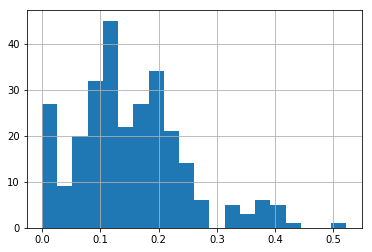

In [38]:
attData1.utilizationMean.hist(bins=20)
plt.show()

In [39]:
attData1.utilizationMean.std()

0.093894502194372842

In [40]:
attData1[attData1['Label'] == 'Low'].shape

(209, 16)

In [41]:
attData1.location.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [55]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [56]:
# X is the computer attributes
# Y is the outcome variable, Setting this as High or Low 

X = attData1.values[:, [3,4,5,6,7,8,9,10,11,12,13]]
#X = attData.values[:, [3,4,6,7,8,9,10,11,12,13]]
Y = attData1.values[:, [15]]

In [57]:
# split data into training and test sets 70/30

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [58]:
# Decision tree classifier with criterion gini index

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [59]:
# Decision tree classifier with criterion information gain

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [60]:
#X_test[0]

In [61]:
# Try to predict using test set first record

#clf_gini.predict([[1, 1, 3, 0, 1, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]])

In [62]:
#Prediction for Decision Tree classifier with criterion gini index

y_pred = clf_gini.predict(X_test)
y_pred

array(['Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low'], dtype=object)

In [63]:
#Prediction for Decision Tree classifier with criterion as information gain

y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low'], dtype=object)

In [64]:
# Accuracy Score for the Decision Tree classifier with criterion as gini index

print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Accuracy is  71.4285714286


In [65]:
# Accuracy Score for the Decision Tree classifier with criterion as information gain

print "Accuracy is ", accuracy_score(y_test,y_pred_en)*100

Accuracy is  72.619047619


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [67]:
clf = RandomForestClassifier()
trained_model = clf.fit(X_train, y_train)
print "Trained model : ", trained_model

predictions = trained_model.predict(X_test)
 
for i in xrange(0, 5):
    print "Actual outcome :: {} and Predicted outcome :: {}".format(list(y_test)[i], predictions[i])

Trained model :  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Actual outcome :: ['Low'] and Predicted outcome :: Low
Actual outcome :: ['High'] and Predicted outcome :: Low
Actual outcome :: ['High'] and Predicted outcome :: High
Actual outcome :: ['Low'] and Predicted outcome :: Low
Actual outcome :: ['Low'] and Predicted outcome :: Low


/Users/moyockmike/Envs/CSC693/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [71]:
print "Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train))*100
print "Test Accuracy  :: ", accuracy_score(y_test, predictions)*100
 

Train Accuracy ::  85.0515463918
Test Accuracy  ::  73.8095238095


In [69]:
print " Confusion matrix ", confusion_matrix(y_test, predictions)

 Confusion matrix  [[10 18]
 [ 4 52]]
